## data 준비

- CTR : Click-Through Rate , 전체 페이지 뷰 횟수 대비 특정 광고를 클릭한 횟수의 비율
  - 어떤 사용자가 현재 보고있는 웹 페이지에 노출된 광고를 클릭할지 예측하는 이진 분류 문제
- 캐글 온라인 광고 클릭 예측 모델을 위한 데이터 세트
    - https://www.kaggle.com/c/avazu-ctr-prediction/download/train.gz
- train.csv : 시간 순으로 정렬된 10일 간의 광고 클릭 예측을 위한 데이터 

In [85]:
import pandas as pd

train_df = pd.read_csv("./avazu-ctr-prediction/train.csv", nrows = 100000)
    # 행을 10만개만 가져옴 : 데이터의 양이 너무 많아 제한적으로 로드하여 사용 
train_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [86]:
train_df.columns # 컬럼 정보 확인 

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

- **데이터 필드 구성**
    - id : 광고 아이디
    - click : 클릭(1), 클릭하지 않은 경우(1)
    - hour : YYMMDDHH 형식
    - C1 : 익명 처리된 범주형 변수
    - banner_pors : 배너 위치 0, 1
    - site_id
    - site_domain
    - site_category
    - app_id
    - app_domain
    - app_category
    - device_model
    - device_type
    - device_conn_type
    - C14-C21 : 익명처리된 범주형 변수 

In [87]:
unused_columns, label_column = ["id", "hour", "device_id", "device_ip"], "click"
# 제거할 컬럼과 종속변수 저장 

- train data 생성

In [88]:
# 필요 없는 컬럼 제거
train_df = train_df.drop(unused_columns, axis = 1) 

# 종속변수(y) 제거 후 X data로 저장 
X_dict_train = list(train_df.drop(label_column, axis = 1).T.to_dict().values()) 

In [89]:
# y data에 종속 변수만 저장 
y_train = train_df[label_column] 

- test data 생성

In [90]:
test_df = pd.read_csv("./avazu-ctr-prediction/train.csv",
                      header=0, 
                      skiprows = (1, 100000), # train data에 사용한 데이터 건너뛰기 
                      nrows= 100000) # 결과적으로 train.csv의 100001~200000행을 가져옴 
test_df = test_df.drop(unused_columns, axis = 1)  # X data와 동일하게 전처리 
test_df

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15704,320,50,1722,0,35,100084,79
1,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,6332421a,1,0,15706,320,50,1722,0,35,100084,79
3,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
4,0,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15702,320,50,1722,0,35,-1,79
99996,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,293291c1,1,0,15702,320,50,1722,0,35,-1,79
99997,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15708,320,50,1722,0,35,-1,79
99998,0,1005,0,85f751fd,c4e18dd6,50e219e0,8dbc921a,d9b5648e,0f2161f8,f4fffcd0,1,0,20508,320,50,2351,3,163,-1,61


In [91]:
# train data와 동일하게 생성
X_dict_test = list(test_df.drop(label_column, axis = 1).T.to_dict().values())

y_test = test_df[label_column]

## one-hot encoding vector 변환

In [92]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse = True)

 **DictVectorizer()**
- python의 딕셔너리를 머신러닝 모델이 이해할 수 있는 숫자 형태의 **희소 행렬(sparse matrix)**로 변환함
  1. 딕셔너리 리스트에서 모든 key(특성 이름)를 추출
  2. 특성 값 변환 : 숫자형은 그대로, 문자열 형태의 범주형 값은 원-핫 인코딩 방식으로 변환
  3. 희소 행렬 생성 : sparse = True
     - 희소 행렬은 대부분의 값이 0인 행렬을 효율적으로 저장하는 방식
     - -> 범주형 특성이 많아 원-핫 인코딩 후 생성된 0값을 저장할 때 메모리 사용량을 크게 감소시킴 

In [93]:
# 딕셔너리에서 희소행렬로 변환 
X_train = vectorizer.fit_transform(X_dict_train)
X_train.shape

(100000, 4952)

In [94]:
X_train # 희소행렬 확인 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1900000 stored elements and shape (100000, 4952)>

In [95]:
#희소 행렬 형태를 밀집 배열(dense array)로 변환 : 단순히 데이터를 확인하기 편하려고 변환해서 확인 
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

In [96]:
X_test = vectorizer.fit_transform(X_dict_test)

## 그리드 서치를 이용한 의사결정 트리 모델 학습

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
# 의사결졍 트리 하이퍼파라미터 설정 
parameters = {"max_depth": [3, 10, None]} # 3가지 값 모두 탐색 

- max_depth : 트리의 최대 깊이 설정
  - 트리의 깊이 : 루트 노드에서 리프 노드까지 가장 긴 경도에 있는 노드 수

In [99]:
decision_tree = DecisionTreeClassifier(criterion = "gini", min_samples_split = 30)

In [100]:
from sklearn.model_selection import GridSearchCV

- **Grid Search(그리드 서치)**
  - parameters 딕셔너리에 정의된 모든 가능한 하이퍼파라미터 조합을 시도
  - 본 파일에서는 max_depth가 3인 모델, 10인 모델, none인 모델 모두 시도한 후
  - 교차검증(k-fold)을 통해 평가하고 가장 좋은 성능을 보인 하이퍼 파라미터 조합을 최종 모델로 선택함  

In [101]:
grid_search_kf = GridSearchCV(decision_tree, # 수행할 모델 종류
                           parameters, # 탐색할 하이퍼 파라미터 
                           n_jobs = -1, # 병렬 처리할 CPU 코어의 수, -1은 사용한 모든 코어 사용(학습속도 증가)
                           cv = 3,  # k=3인 k-fold 수행 : 교차검증을 따로 수행할 필요 X
                           scoring = "roc_auc") # roc 곡선 아래 면적을 분류 평가 지표로 설정 

In [102]:
grid_search_kf.fit(X_train, y_train) # 모델 학습 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [121]:
# 가장 성능이 좋아 선택된 하이퍼 파라미터 출력 
print("Best Parameters:", grid_search_kf.best_params_)
print("Best ROC AUC:", grid_search_kf.best_score_)

Best Parameters: {'max_depth': 10}
Best ROC AUC: 0.7100953277487939


In [104]:
# 최적의 하이퍼파라미터 조합으로 학습된 모델 객체 저장 : max_depth 10인 모델 
decision_tree_kf_best = grid_search_kf.best_estimator_
decision_tree_kf_best

DecisionTreeClassifier(max_depth=10, min_samples_split=30)

- SKF로 교차검증방법 변경해서 그리드 서치 사용

In [115]:
from sklearn.model_selection import StratifiedKFold

In [116]:
decision_tree = DecisionTreeClassifier(criterion = "gini", min_samples_split = 30)
parameters = {"max_depth": [3, 10, None]}

In [117]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [118]:
grid_search_Skf = GridSearchCV(decision_tree,
                            parameters,
                            n_jobs=-1,
                            cv=stratified_kfold,
                            scoring="roc_auc")

In [119]:
grid_search_Skf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(min_samples_split=30), n_jobs=-1,
             param_grid={'max_depth': [3, 10, None]}, scoring='roc_auc')

In [120]:
print("Best Parameters:", grid_search_Skf.best_params_)
print("Best ROC AUC:", grid_search_Skf.best_score_)

Best Parameters: {'max_depth': 10}
Best ROC AUC: 0.7097154743063873


## 의사결정 트리 모델 성능 측정 
### 정확도, 혼동 행렬, ROC의 AUC

In [113]:
y_pred_kf = decision_tree_kf_best.predict(X_test) # test로 y값 예측 
y_pred_kf

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
import numpy as np
np.unique(y_pred_kf, return_counts = True) # 고윳값 확인 

(array([0, 1]), array([96545,  3455]))

In [107]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_kf) # 정확도 확인 

0.83249

In [108]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_kf) # 혼동행렬 출력 

array([[81152,  1358],
       [15393,  2097]])

In [109]:
from sklearn.metrics import roc_auc_score, roc_curve

# X_test에 대한 클래스 1의 예측 확률
y_pred_kf_proba = decision_tree_kf_best.predict_proba(X_test)[:, 1]
y_pred_kf_proba

array([0.20767654, 0.13114754, 0.24324324, ..., 0.11586207, 0.06559647,
       0.06559647])

In [110]:
fpr, tpr, _ = roc_curve(y_test, y_pred_kf_proba)

In [111]:
auc = roc_auc_score(y_test, y_pred_kf_proba)

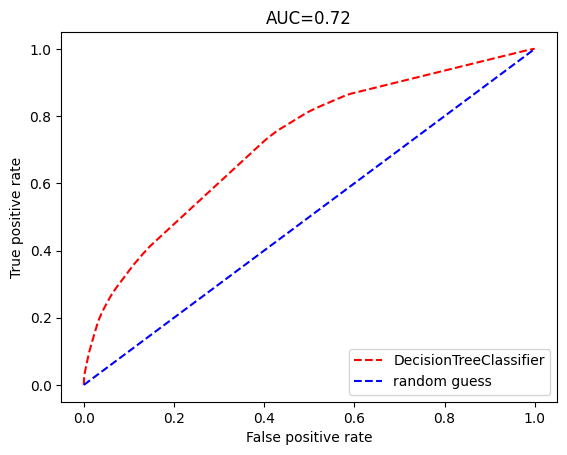

In [112]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, "r--", label = "DecisionTreeClassifier")
plt.plot([0,1], [0,1], "b--", label="random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("AUC={0:.2f}".format(auc)) # auc 소수점 2번째까지 출력
plt.legend(loc = "lower right") # 범례 오른쪽 아래 출력 

---
## 앙상블 학습과 배깅

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()

In [51]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=500, n_jobs=-1)
random_forest.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [52]:
# 모델이 학습하는데에 있어서 feature 당 중요도 비율 
for feature, importance in zip(iris.feature_names, random_forest.feature_importances_):
    print("{}:{}".format(feature, importance)) 

sepal length (cm):0.10261831883814845
sepal width (cm):0.025898650954837937
petal length (cm):0.42848708872039915
petal width (cm):0.44299594148661453


### 특징 기반 배깅을 이용하는 트리 배깅 모델 랜덤 포레스트의 학습

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
random_forest = RandomForestClassifier(n_estimators=100, criterion="gini",
                                      min_samples_split= 30, n_jobs= -1)

- 랜덤 포레스트의 성능 개선을 위한 주요 파라미터
  - max_features : 최적의 분할 지점을 찾기 위해 검토할 특징 개수. 보통 n차원 dataset의 n^0.5의 반올림으로 설정
  - n_estimators : 트리의 개수가 많을 수록 성능이 더 좋지만 계산 시간이 오래 걸려 보통 100,200,500 설정
  - min_samples_split :추가 분할을 위한 필요한 샘플 최소 개수(10,30,50). 너무 적으면 과대적합, 많으면 과소적합 

In [55]:
grid_search = GridSearchCV(random_forest, parameters, n_jobs=-1, cv=3, scoring="roc_auc")

In [58]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_split=30, n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

### 랜덤 포레스트 모델의 성능 측정
- 정확도, 혼동행렬, ROC의 AUC

In [59]:
grid_search.best_params_

{'max_depth': None}

In [60]:
random_forest_best = grid_search.best_estimator_

In [61]:
y_pred = random_forest_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
accuracy_score(y_test, y_pred)

0.85165

In [63]:
confusion_matrix(y_test, y_pred)

array([[81308,  1202],
       [13633,  3857]])

In [65]:
y_pred_proba = random_forest_best.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.20452145, 0.13124618, 0.30254872, ..., 0.11872642, 0.17920012,
       0.04817382])

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [67]:
auc = roc_auc_score(y_test, y_pred_proba)

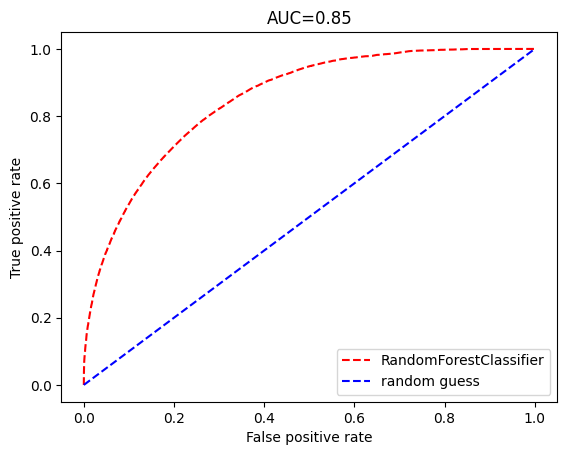

In [68]:
plt.plot(fpr, tpr, "r--", label = "RandomForestClassifier")
plt.plot([0,1], [0,1], "b--", label="random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc = "lower right")